In [1]:
from src.dataviz import DatabasePlots

In [2]:
db_plots = DatabasePlots()

In [16]:
db_plots.df.CENTRE_POINTS.head(5)

,node,node_verbose,country,region,subregion,geometry
0,AFG-XX,Afghanistan,Afghanistan,Asia,Southern Asia,POINT (66.03059 33.82888)
1,AGO-XX,Angola,Angola,Africa,Sub-Saharan Africa,POINT (17.57616 -12.33727)
2,ALB-XX,Albania,Albania,Europe,Southern Europe,POINT (20.06196 41.14084)
3,ARE-XX,United Arab Emirates,United Arab Emirates,Asia,Western Asia,POINT (54.33630 23.90734)
4,ARG-XX,Argentina,Argentina,Americas,Latin America and the Caribbean,POINT (-65.14102 -35.18534)


In [17]:
db_plots.df.DATABASE.head(5)

,from,to,existing capacity + (mw),existing capacity - (mw),planned capacity + (mw),planned capacity - (mw),year planned,assumptions/applied methods,other notes,source existing (2023),source planned
0,AFG-XX,CHN-XI,0.0,0.0,0.0,0.0,NaN,NaN,Afghanistan had joined China's Belt and Road i...,https://iea.blob.core.windows.net/assets/b066e...,https://www.reuters.com/world/asia-pacific/tal...
1,AFG-XX,IRN-XX,175.0,-175.0,325.0,-325.0,NaN,It's reported that as of 2022 trade potential ...,NaN,https://www.tehrantimes.com/news/468852/Iran-e...,https://www.tehrantimes.com/news/468852/Iran-e...
2,AFG-XX,PAK-XX,0.0,0.0,0.0,0.0,NaN,NaN,Following the specifics of the CASA-1000 proje...,https://iea.blob.core.windows.net/assets/b066e...,https://iea.blob.core.windows.net/assets/b066e...
3,AFG-XX,TKM-XX,0.0,-400.0,1000.0,-1000.0,NaN,NaN,Currently a trade agreement of 400 MW for unil...,https://iea.blob.core.windows.net/assets/b066e...,https://pajhwok.com/2023/01/29/power-supply-pr...
4,ARE-XX,IND-WE,0.0,0.0,0.0,0.0,NaN,NaN,"No capacity as of yet, but a subsea transmissi...",https://openinframap.org/#4.16/20.3/63.43,https://www.siasat.com/india-planning-power-gr...


In [18]:
db_plots.df.GEOMETRY.head(5)

,REGION,SUBREGION,geometry,iso_region,iso_subregion
node,,,,,
MNP-XX,MNP,XX,"MULTIPOLYGON (((145.63331 14.91236, 145.62412 ...",Oceania,Micronesia
FRA-XX,FRA,XX,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",Europe,Western Europe
SRB-XX,SRB,XX,"POLYGON ((20.26102 46.11485, 20.31403 46.06986...",Europe,Southern Europe
URY-XX,URY,XX,"POLYGON ((-53.37430 -33.74067, -53.39917 -33.7...",Americas,Latin America and the Caribbean
GUM-XX,GUM,XX,"POLYGON ((144.70941 13.23500, 144.70245 13.235...",Oceania,Micronesia


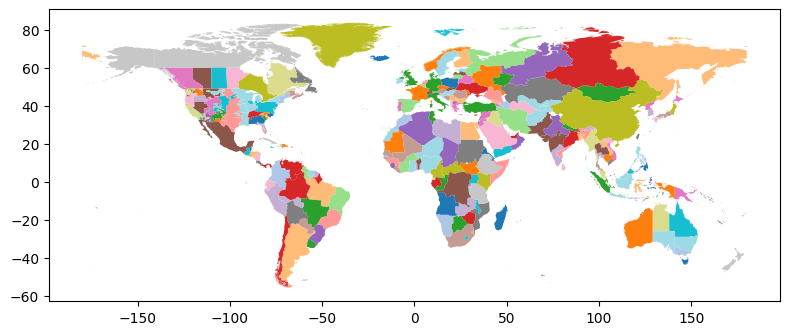

In [4]:
fig = db_plots.spatial_representation(
    by="region",
    area="world"
)
fig.savefig("../outputs/figures/spatial-representation.jpeg")

In [10]:
fig = db_plots.map_excluded_regions(
    showgrid=True
)

fig.write_html('../outputs/figures/map_excluded_regions.html')
fig.show()

In [ ]:
fig,nodes,lines = db_plots.map_transmission_lines(
    bins = [0,1,5,10,25],
    labels = ['0-1','1-5','5-10','10-25'],
    planned_capacity=True,
    node_size=4,
)

fig.write_html('../outputs/figures/map_capacity_planned.html')
fig.show()

In [ ]:
fig,nodes,lines = db_plots.map_transmission_lines(
    bins = [0,1,5,10,25],
    labels = ['0-1','1-5','5-10','10-25'],
    planned_capacity=False,
    node_size=4,
    #title='A',
)

fig.write_html('../outputs/figures/map_capacity_existing.html')
fig.show()

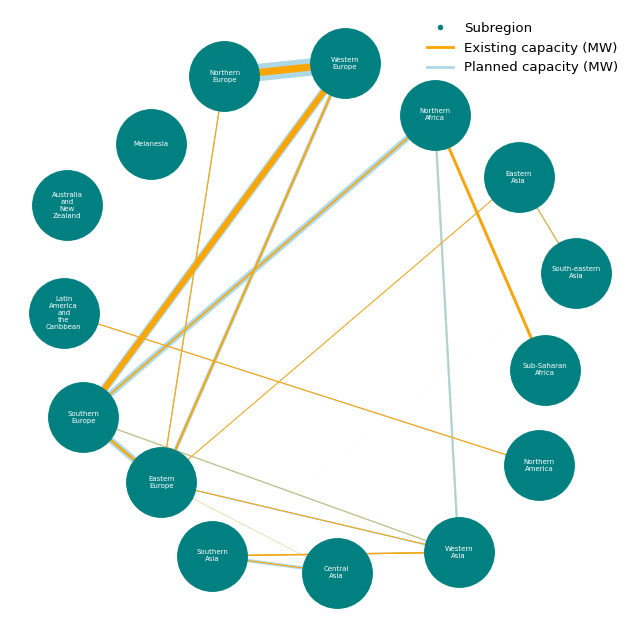

In [5]:
f = db_plots.network_topology(
    by='subregion',
    jitter=100,
    node_size=2500,
    font_size=5,
    legend_scale=1.2,
    figsize=(8,8),
)

f.savefig(
    fname = '../outputs/figures/nx_network_topology.pdf',
    bbox_inches = 'tight',
)

In [32]:
# db_plots.network_topology(
#     by='subregion',
#     jitter=100,
#     node_size=4000,
#     font_size=8,
#     legend_scale=1.3,
#     figsize=(10,10),
#     colours = {'planned' : 'lightcoral', 'existing' : 'teal'},
# )